In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [4]:
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.9824561403508771

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [6]:
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.9824561403508771


mean compactness           0.648342
compactness error          0.647227
fractal dimension error    0.437894
symmetry error             0.360492
texture error              0.248823
mean fractal dimension     0.199732
concavity error            0.160563
worst compactness          0.055514
smoothness error          -0.160276
mean symmetry             -0.167233
dtype: float64
worst texture          -1.255088
radius error           -1.082965
worst concave points   -0.953686
worst area             -0.947756
worst radius           -0.947616
worst symmetry         -0.939181
area error             -0.929104
worst concavity        -0.823151
worst perimeter        -0.763220
worst smoothness       -0.746625
dtype: float64


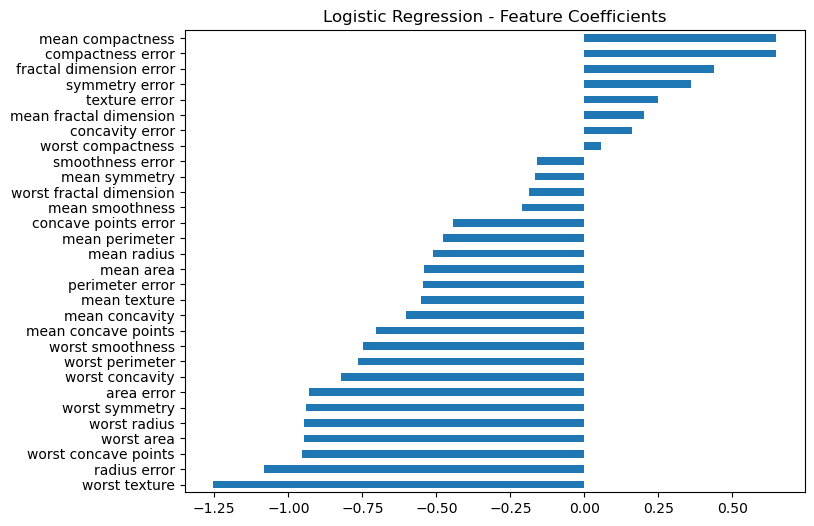

In [7]:
coef = pd.Series(log_reg.coef_[0], index=X.columns)

print(coef.sort_values(ascending=False).head(10))
print(coef.sort_values().head(10))

coef.sort_values().plot(kind="barh", figsize=(8,6), title="Logistic Regression - Feature Coefficients")
plt.show()

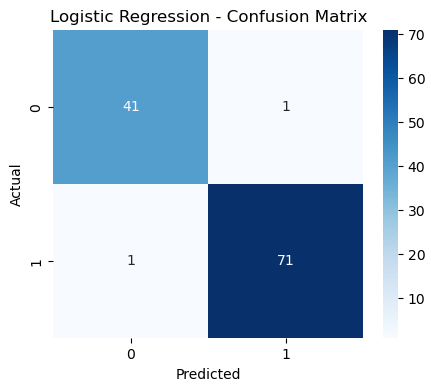

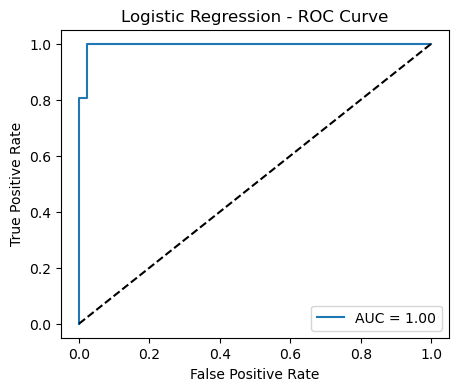

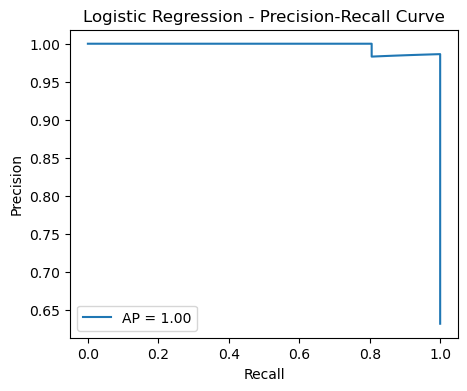

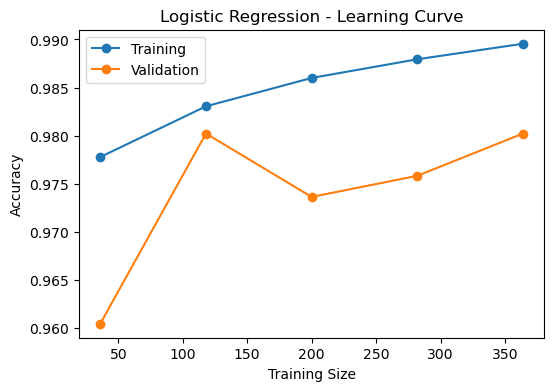

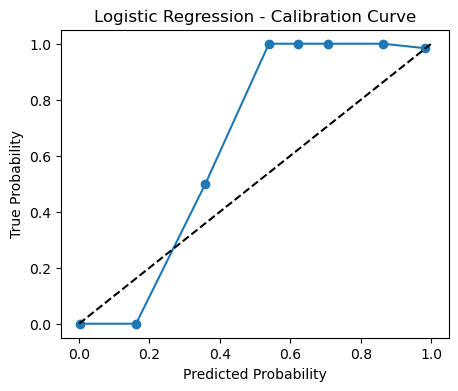

In [8]:
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"k--")
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba_log)
ap = average_precision_score(y_test, y_proba_log)
plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.title("Logistic Regression - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy"
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation")
plt.title("Logistic Regression - Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

prob_true, prob_pred = calibration_curve(y_test, y_proba_log, n_bins=10)
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1], 'k--')
plt.title("Logistic Regression - Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.show()